In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.visualization import (histogram, boxplot, scatterplot, hist_per_district, scatter_per_district,
                               ordered_barchart, correlation_plot)
from scipy import stats
%load_ext autoreload
%autoreload 2
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
#sns.set_context('poster')

path_processed = '/home/matteo@COPPET/Documents/data_science/projects/housing_prices_firenze/data/processed/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv(path_processed+'data_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tipologia                    7625 non-null   object 
 1   Zona                         7625 non-null   object 
 2   Stato                        7426 non-null   object 
 3   Prezzo_EUR                   7625 non-null   float64
 4   Superficie_m2                7625 non-null   float64
 5   Prezzo_per_m2                7625 non-null   float64
 6   Classe_immobile              6589 non-null   object 
 7   Tipo_proprietà               7250 non-null   object 
 8   A_reddito                    7625 non-null   object 
 9   Anno_costruzione_bins        5637 non-null   object 
 10  Riscaldamento_A_C            7625 non-null   object 
 11  Tipo_riscaldamento           5986 non-null   object 
 12  Alimentazione_riscaldamento  5711 non-null   object 
 13  Classe_energetica 

### 1. Continuous variables

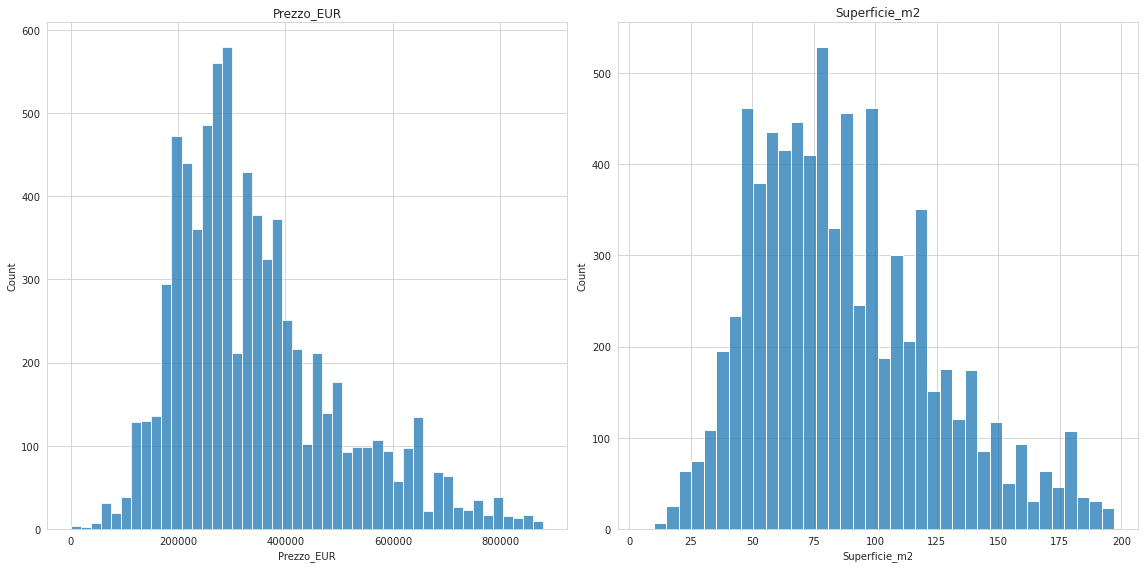

In [3]:
continuous_vars = ['Prezzo_EUR', 'Superficie_m2']
histograms = histogram(df, continuous_vars, transformation=None)
plt.show()

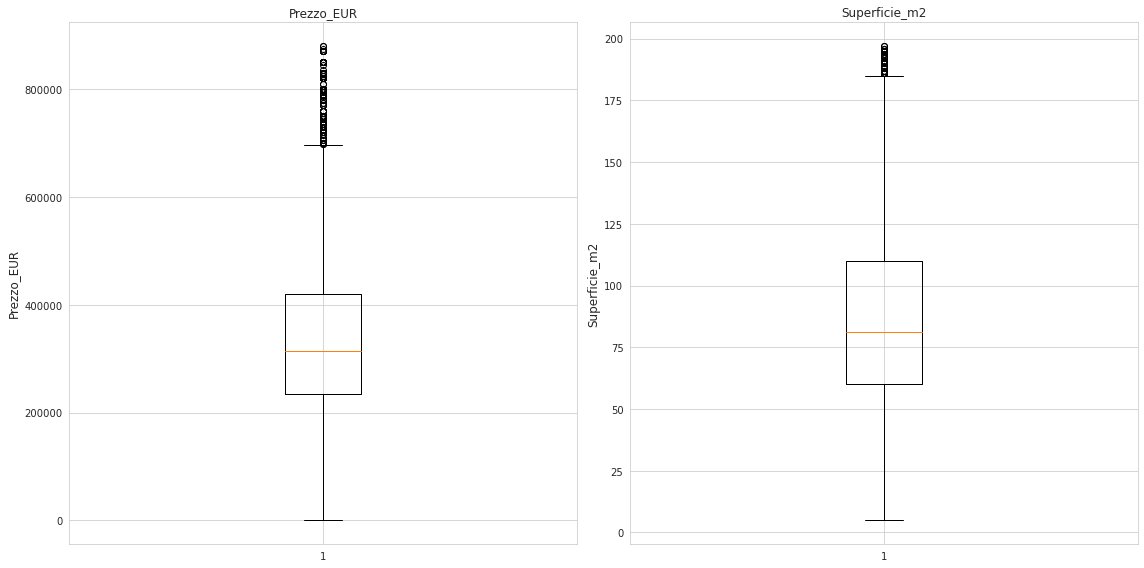

In [4]:
boxplots = boxplot(df, continuous_vars, transformation=None)
plt.show()

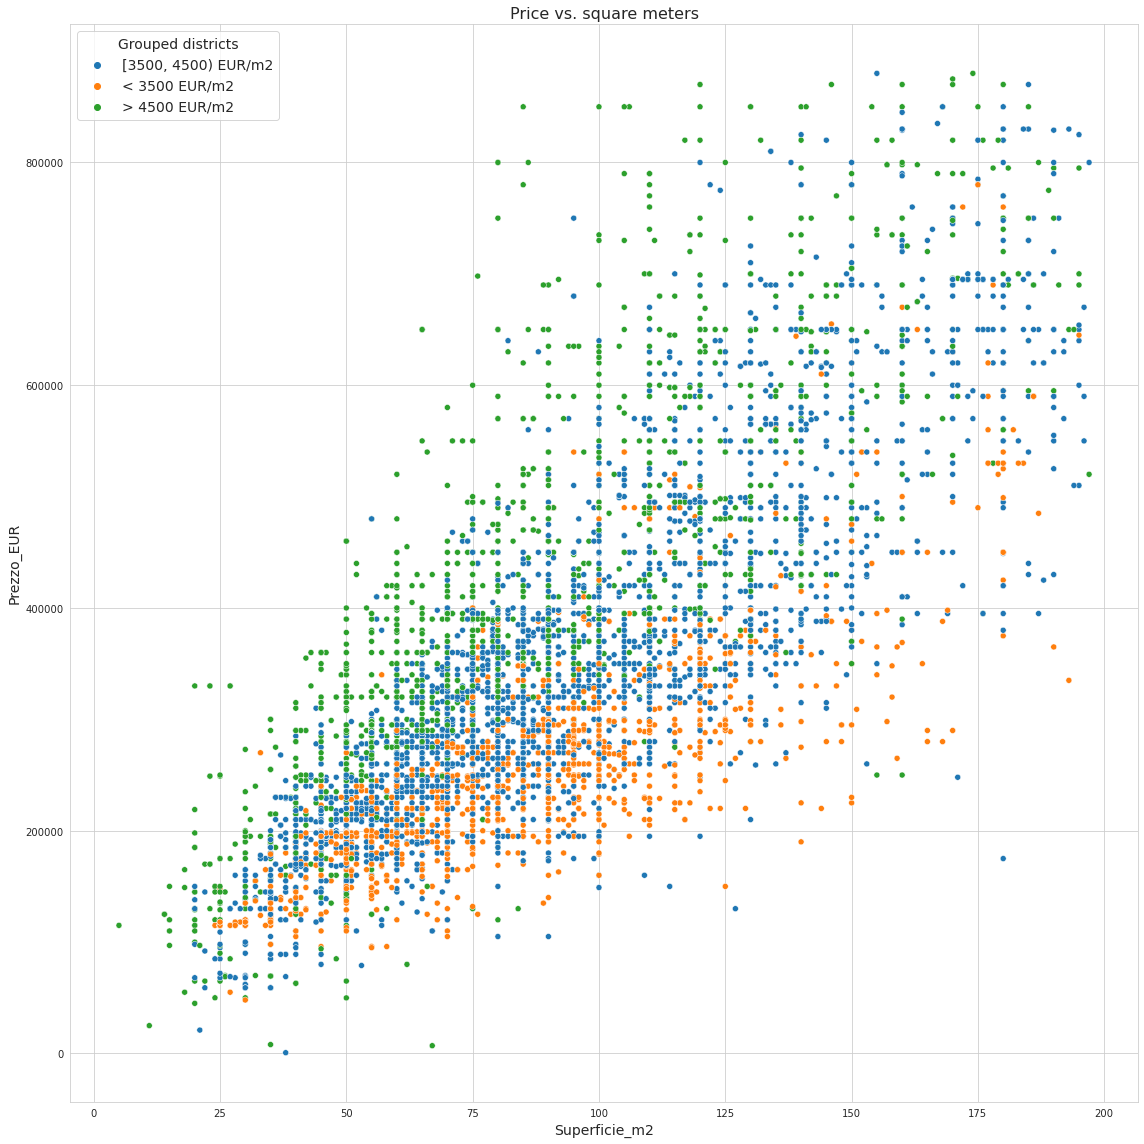

In [42]:
gb_ordered = df.groupby('Zona').agg({'Prezzo_per_m2': 'mean'}).sort_values('Prezzo_per_m2', ascending=False)
df.loc[df['Zona'].isin(gb_ordered[gb_ordered['Prezzo_per_m2'] < 3500].index), 'hue'] = '< 3500 EUR/m2'
df.loc[df['Zona'].isin(gb_ordered[gb_ordered['Prezzo_per_m2'] >= 4500].index), 'hue'] = '> 4500 EUR/m2'
df.loc[(df['Zona'].isin(gb_ordered[gb_ordered['Prezzo_per_m2'] < 4500].index)) & \
         (df['Zona'].isin(gb_ordered[gb_ordered['Prezzo_per_m2'] >= 3500].index)),
         'hue'] = '[3500, 4500) EUR/m2'


scatter = scatterplot(df, 'Superficie_m2', 'Prezzo_EUR', hue_data=df['hue'], log=False)
plt.show()

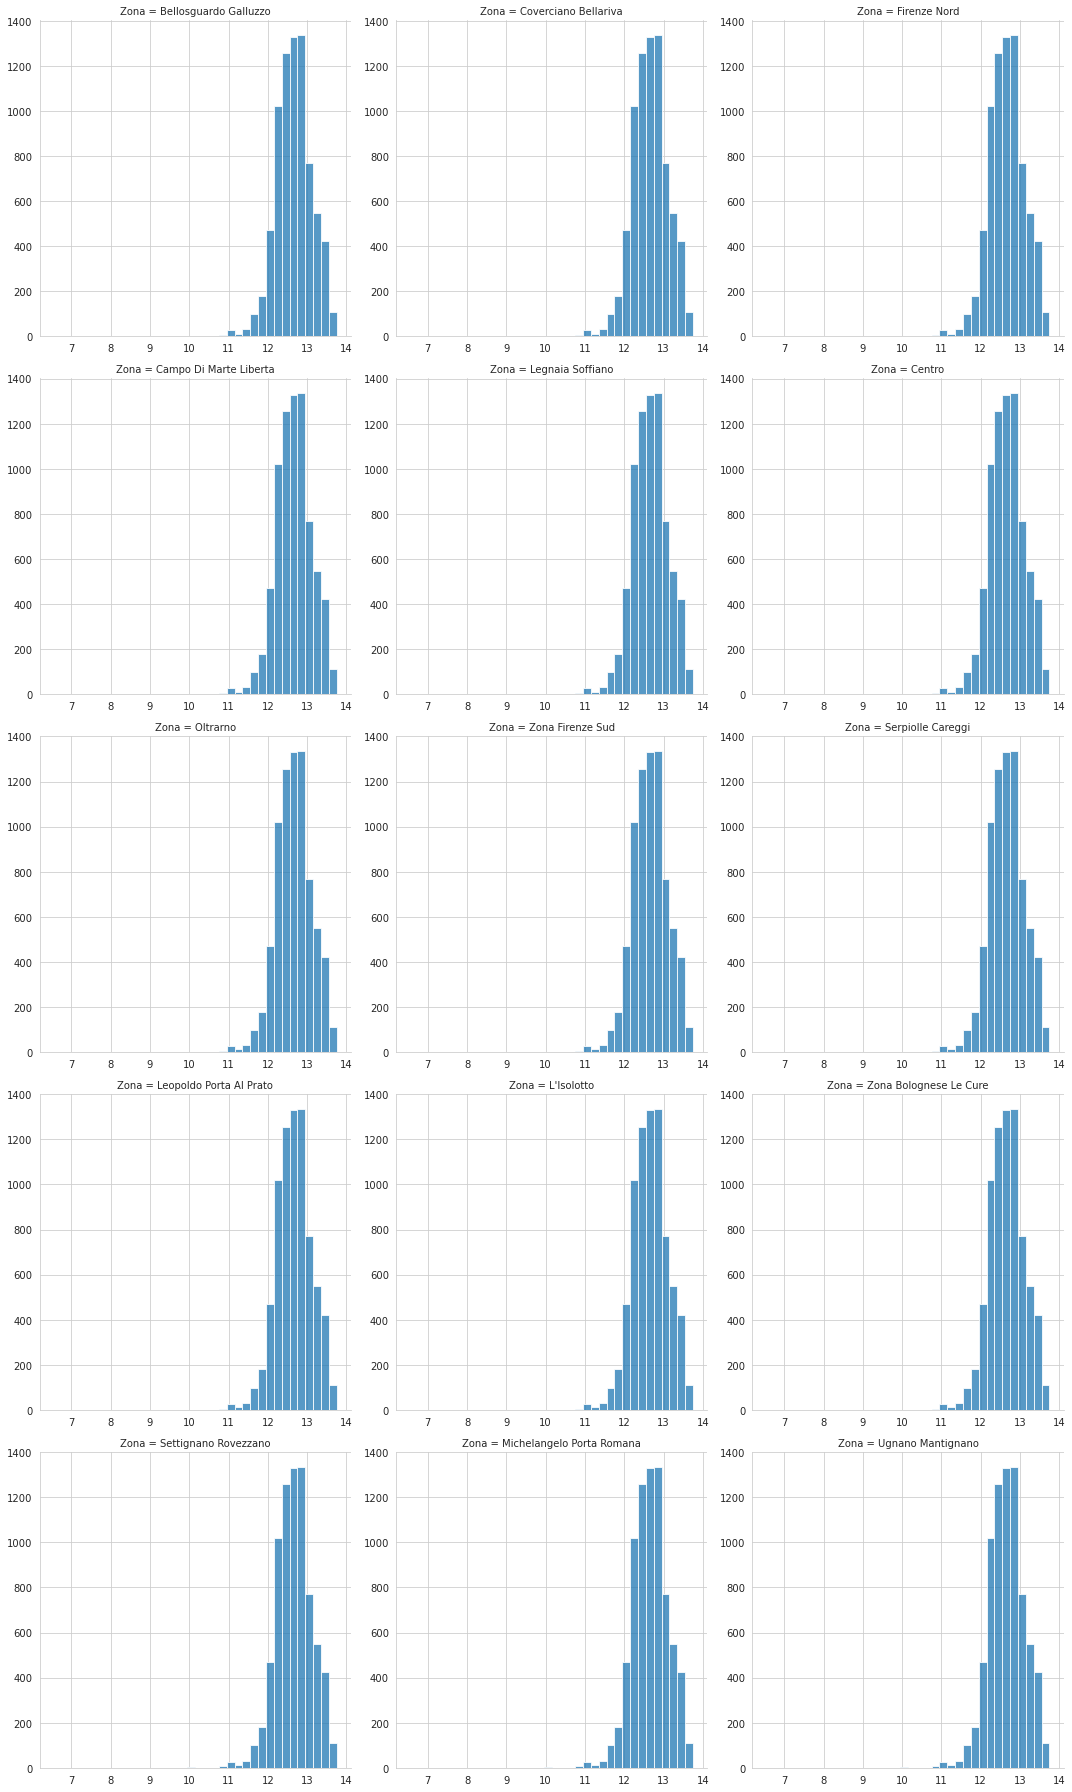

In [6]:
hists = hist_per_district(df, col='Zona', row=None, feature='Prezzo_EUR', transformation=np.log)
plt.show()

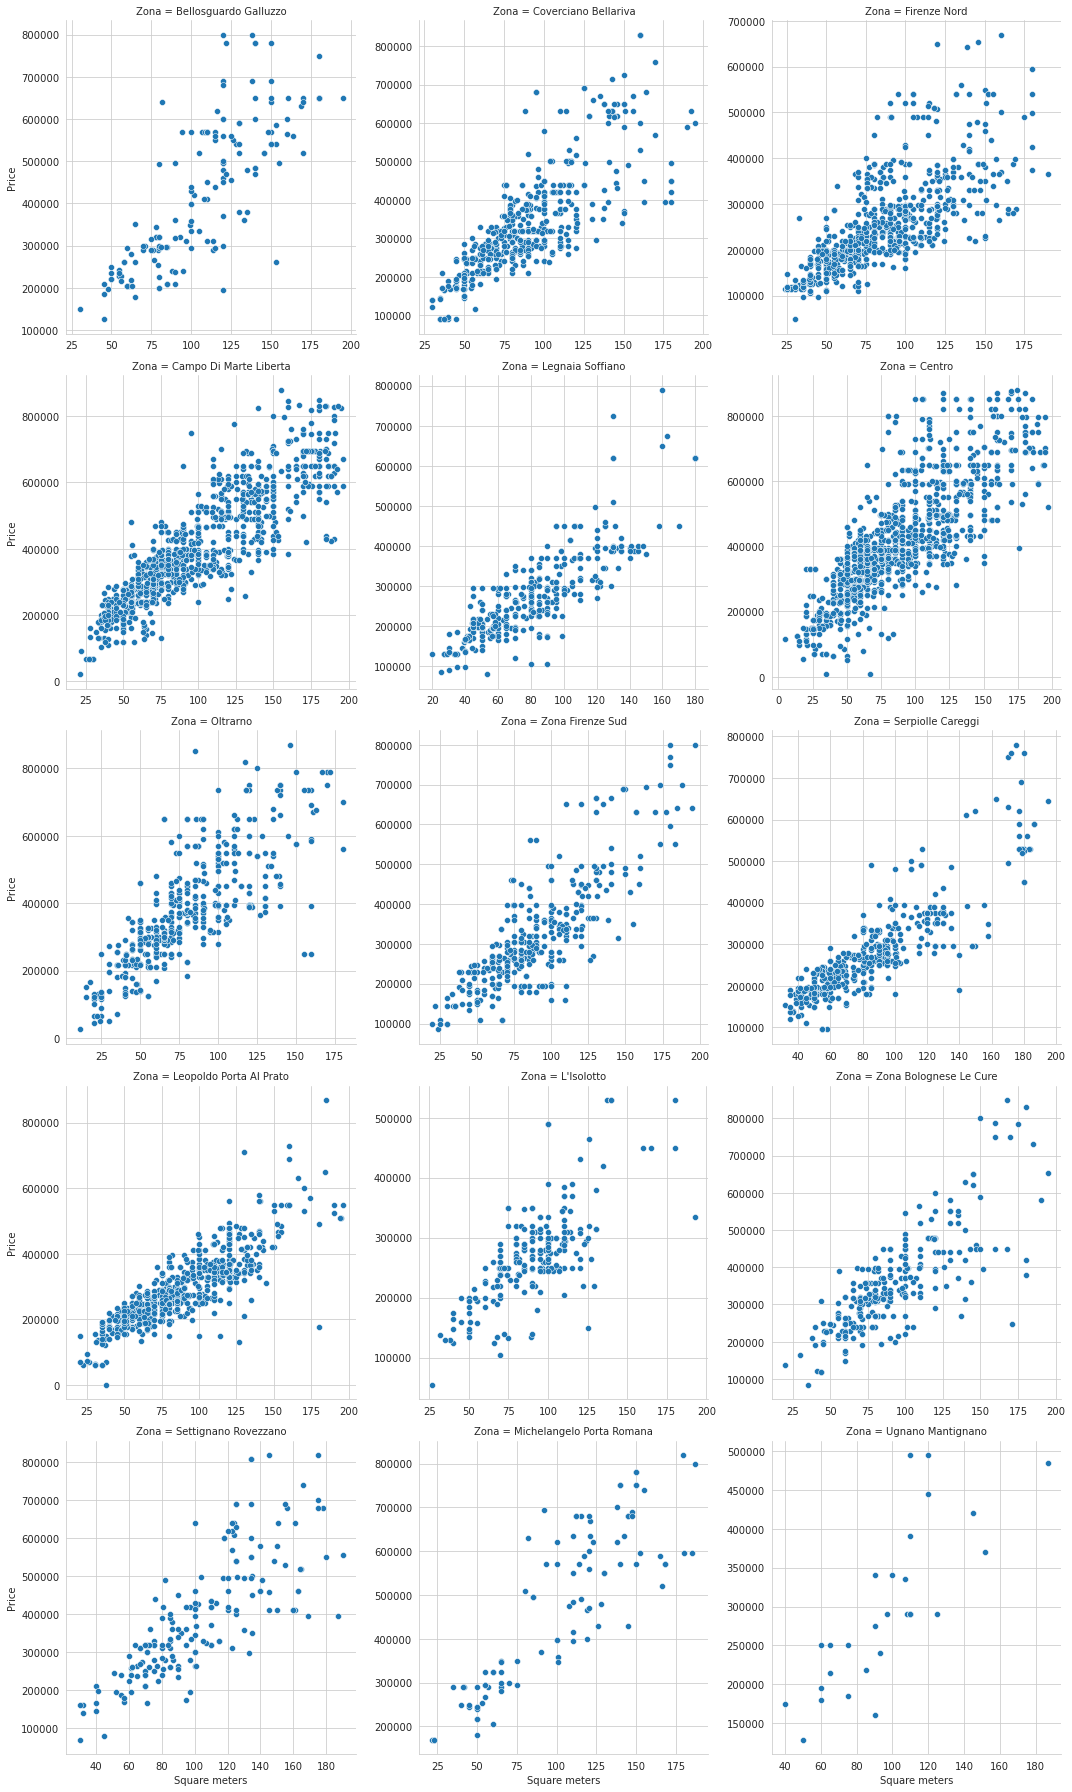

In [43]:
scatters = scatter_per_district(df, col='Zona', row=None, log=False)
plt.show()

### 2. Categorical variables

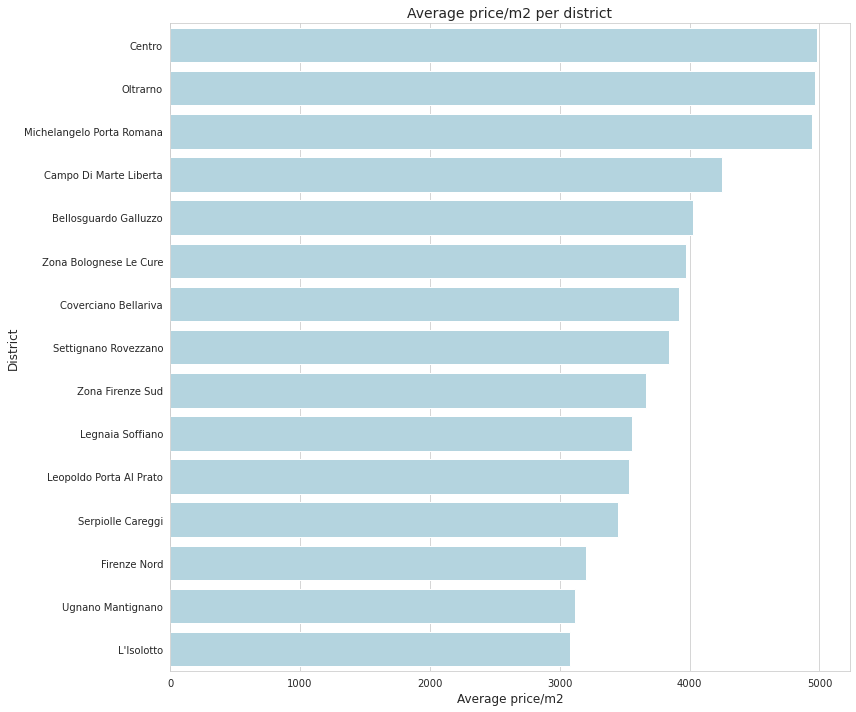

In [56]:
barchart = ordered_barchart(df)
plt.show()

### 3. Correlation plot

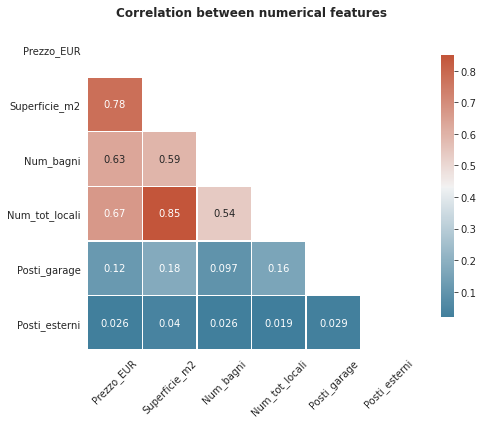

In [9]:
corr_cols = ['Prezzo_EUR', 'Superficie_m2', 'Num_bagni', 'Num_tot_locali', 'Posti_garage', 'Posti_esterni']
corr_plot = correlation_plot(df, corr_cols)